In [1]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.tri as mtri

In [2]:
dt1 = pd.DataFrame({'beta':[5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1],
                  'c':[5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1],
                  'theta':[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5],
                  'Galton Skewness':[7,3.33,4.22,2.85,1.65,7,3.33,4.22,2.85,1.65,
                                    7,3.33,4.22,2.85,1.65,7,3.33,4.22,2.85,1.65,
                                    7,3.33,4.22,2.85,1.65],
                   'Moors Kurtosis':[-0.048,-0.032,-0.0062,-0.044,0.187,-0.0485,-0.0323,-0.0062,0.0441,0.187,
                                    -0.048,-0.032,-0.0062,0.044,0.187,-0.0484,-0.0323,-0.0061,0.0441,0.187,
                                    -0.0484,-0.032,-0.0062,0.0442,0.187]})

In [3]:
dt2 = pd.DataFrame({'beta':[5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1],
                  'c':[5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1,5,4,3,2,1],
                  'theta':[1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5],
                  'Moors Kurtosis':[-0.048,-0.032,-0.0062,-0.044,0.187,-0.0485,-0.0323,-0.0062,0.0441,0.187,
                                    -0.048,-0.032,-0.0062,0.044,0.187,-0.0484,-0.0323,-0.0061,0.0441,0.187,
                                    -0.0484,-0.032,-0.0062,0.0442,0.187]})

In [4]:
dt1

,beta,c,theta,Galton Skewness,Moors Kurtosis
0,5,5,1,7.00,-0.0480
1,4,4,1,3.33,-0.0320
2,3,3,1,4.22,-0.0062
3,2,2,1,2.85,-0.0440
4,1,1,1,1.65,0.1870
5,5,5,2,7.00,-0.0485
6,4,4,2,3.33,-0.0323
7,3,3,2,4.22,-0.0062
8,2,2,2,2.85,0.0441
9,1,1,2,1.65,0.1870


In [62]:
dt1

,beta,c,theta,Galton Skewness,Moors Kurtosis
0,5,5,1,7.00,-0.0480
1,4,4,1,3.33,-0.0320
2,3,3,1,4.22,-0.0062
3,2,2,1,2.85,-0.0440
4,1,1,1,1.65,0.1870
5,5,5,2,7.00,-0.0485
6,4,4,2,3.33,-0.0323
7,3,3,2,4.22,-0.0062
8,2,2,2,2.85,0.0441
9,1,1,2,1.65,0.1870


In [4]:
do_random_pt_example = True;

index_x = 0; index_y = 1; index_z = 2; index_c = 3;
list_name_variables = ['theta', 'beta', 'c', 'Galton Skewness'];
name_color_map = 'seismic';

if do_random_pt_example:
    number_of_points = 200;
    x = np.random.randint(1,6,size = number_of_points);
    y = np.random.randint(1,6,size = number_of_points);
    z = np.random.randint(1,6,size = number_of_points);
    c = np.linspace(0.10,7,num = number_of_points,dtype = float);
else:
    # Example where we have a "Pandas Dataframe" where each line = 1 pt in 4D.
    # We assume here that the "data frame" "df" has already been loaded before.
    x = dt1[list_name_variables[index_x]]; 
    y = dt1[list_name_variables[index_y]]; 
    z = dt1[list_name_variables[index_z]]; 
    c = dt1[list_name_variables[index_c]];

In [5]:
# We create triangles that join 3 pt at a time and where their colors will be
# determined by the values ​​of their 4th dimension. Each triangle contains 3
# indexes corresponding to the line number of the points to be grouped. 
# Therefore, different methods can be used to define the value that 
# will represent the 3 grouped points and I put some examples.
triangles = mtri.Triangulation(x, y).triangles;

choice_calcuation_colors = 1;
if choice_calcuation_colors == 1: # Mean of the "c" values of the 3 pt of the triangle
    colors = np.mean( [c[triangles[:,0]], c[triangles[:,1]], c[triangles[:,2]]], axis = 0);
elif choice_calcuation_colors == 2: # Mediane of the "c" values of the 3 pt of the triangle
    colors = np.median( [c[triangles[:,0]], c[triangles[:,1]], c[triangles[:,2]]], axis = 0);
elif choice_calcuation_colors == 3: # Max of the "c" values of the 3 pt of the triangle
    colors = np.max( [c[triangles[:,0]], c[triangles[:,1]], c[triangles[:,2]]], axis = 0);
#end

In [6]:
do_random_pt_example = True;

index_x = 0; index_y = 1; index_z = 2; index_c = 3;
list_name_variables = ['c', 'theta', 'beta', 'Moors Kurtosis'];
name_color_map = 'seismic';

if do_random_pt_example:
    number_of_points = 200;
    x = np.random.randint(1,6,size = number_of_points);
    y = np.random.randint(1,6,size = number_of_points);
    z = np.random.randint(1,6,size = number_of_points);
    c = np.linspace(-0.05,0.20,num = number_of_points,dtype = float);
else:
    # Example where we have a "Pandas Dataframe" where each line = 1 pt in 4D.
    # We assume here that the "data frame" "df" has already been loaded before.
    x = dt1[list_name_variables[index_x]]; 
    y = dt1[list_name_variables[index_y]]; 
    z = dt1[list_name_variables[index_z]]; 
    c = dt1[list_name_variables[index_c]];

In [7]:
# We create triangles that join 3 pt at a time and where their colors will be
# determined by the values ​​of their 4th dimension. Each triangle contains 3
# indexes corresponding to the line number of the points to be grouped. 
# Therefore, different methods can be used to define the value that 
# will represent the 3 grouped points and I put some examples.
triangles = mtri.Triangulation(x, y).triangles;

choice_calcuation_colors = 1;
if choice_calcuation_colors == 1: # Mean of the "c" values of the 3 pt of the triangle
    colors = np.mean( [c[triangles[:,0]], c[triangles[:,1]], c[triangles[:,2]]], axis = 0);
elif choice_calcuation_colors == 2: # Mediane of the "c" values of the 3 pt of the triangle
    colors = np.median( [c[triangles[:,0]], c[triangles[:,1]], c[triangles[:,2]]], axis = 0);
elif choice_calcuation_colors == 3: # Max of the "c" values of the 3 pt of the triangle
    colors = np.max( [c[triangles[:,0]], c[triangles[:,1]], c[triangles[:,2]]], axis = 0);
#end

NameError: name 's' is not defined

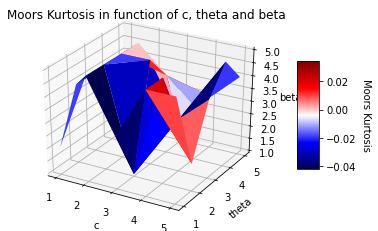

In [9]:
# Displays the 4D graphic.
fig = plt.figure();
ax = fig.gca(projection='3d');
triang = mtri.Triangulation(x, y, triangles);
surf = ax.plot_trisurf(triang, z, cmap = name_color_map, shade=False, linewidth=0.2);
surf.set_array(colors); surf.autoscale();

#Add a color bar with a title to explain which variable is represented by the color.
cbar = fig.colorbar(surf, shrink=0.5, aspect=5);
cbar.ax.get_yaxis().labelpad = 15; cbar.ax.set_ylabel(list_name_variables[index_c], rotation = 270);

# Add titles to the axes and a title in the figure.
ax.set_xlabel(list_name_variables[index_x]); ax.set_ylabel(list_name_variables[index_y]);
ax.set_zlabel(list_name_variables[index_z]);
plt.title('%s in function of %s, %s and %s' % (list_name_variables[index_c], list_name_variables[index_x], list_name_variables[index_y], list_name_variables[index_z]) );

s[index_z];
#plt.savefig('/Users/martinpius/Desktop/API/plotscompact4.eps', format='eps')
plt.show();

In [8]:
do_random_pt_example = True;

index_x = 0; index_y = 1; index_z = 2; index_c = 3;
list_name_variables = ['c', 'theta', 'beta', 'Moors Kurtosis'];
name_color_map = 'seismic';

if do_random_pt_example:
    number_of_points = 200;
    x = np.random.randint(1,6,size = number_of_points);
    y = np.random.randint(1,6,size = number_of_points);
    z = np.random.randint(1,6,size = number_of_points);
    c = np.linspace(-0.05,0.20,num = number_of_points,dtype = float);
else:
    # Example where we have a "Pandas Dataframe" where each line = 1 pt in 4D.
    # We assume here that the "data frame" "df" has already been loaded before.
    x = dt1[list_name_variables[index_x]]; 
    y = dt1[list_name_variables[index_y]]; 
    z = dt1[list_name_variables[index_z]]; 
    c = dt1[list_name_variables[index_c]];

In [9]:
# We create triangles that join 3 pt at a time and where their colors will be
# determined by the values ​​of their 4th dimension. Each triangle contains 3
# indexes corresponding to the line number of the points to be grouped. 
# Therefore, different methods can be used to define the value that 
# will represent the 3 grouped points and I put some examples.
triangles = mtri.Triangulation(x, y).triangles;

choice_calcuation_colors = 1;
if choice_calcuation_colors == 1: # Mean of the "c" values of the 3 pt of the triangle
    colors = np.mean( [c[triangles[:,0]], c[triangles[:,1]], c[triangles[:,2]]], axis = 0);
elif choice_calcuation_colors == 2: # Mediane of the "c" values of the 3 pt of the triangle
    colors = np.median( [c[triangles[:,0]], c[triangles[:,1]], c[triangles[:,2]]], axis = 0);
elif choice_calcuation_colors == 3: # Max of the "c" values of the 3 pt of the triangle
    colors = np.max( [c[triangles[:,0]], c[triangles[:,1]], c[triangles[:,2]]], axis = 0);
#end

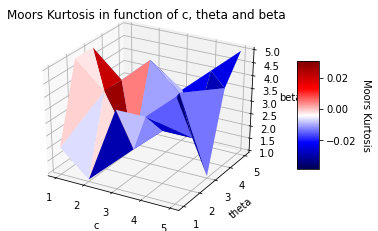

In [21]:
# Displays the 4D graphic.
fig = plt.figure();
ax = fig.gca(projection='3d');
triang = mtri.Triangulation(x, y, triangles);
surf = ax.plot_trisurf(triang, z, cmap = name_color_map, shade=False, linewidth=0.2);
surf.set_array(colors); surf.autoscale();

#Add a color bar with a title to explain which variable is represented by the color.
cbar = fig.colorbar(surf, shrink=0.5, aspect=5);
cbar.ax.get_yaxis().labelpad = 15; cbar.ax.set_ylabel(list_name_variables[index_c], rotation = 270);

# Add titles to the axes and a title in the figure.
ax.set_xlabel(list_name_variables[index_x]); ax.set_ylabel(list_name_variables[index_y]);
ax.set_zlabel(list_name_variables[index_z]);
plt.title('%s in function of %s, %s and %s' % (list_name_variables[index_c], list_name_variables[index_x], list_name_variables[index_y], list_name_variables[index_z]) );
plt.savefig('/Users/martinpius/Desktop/API/plotscompact.pdf', format='pdf')
plt.show();


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


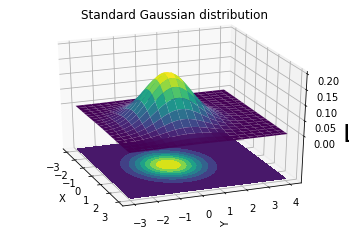

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0], [0 ,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z,zdir = 'z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)
ax.set_xlabel('X')
ax.set_ylabel('Y',rotation = 90)
ax.set_zlabel('L',fontsize=25)
plt.title('Standard Gaussian distribution')
plt.savefig('/Users/martinpius/Desktop/API/plotscompact3.eps', format='eps')
plt.show()


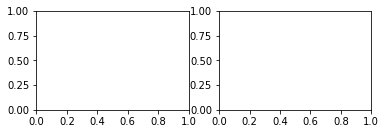

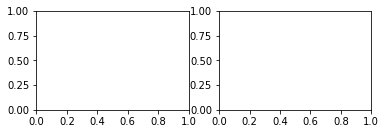

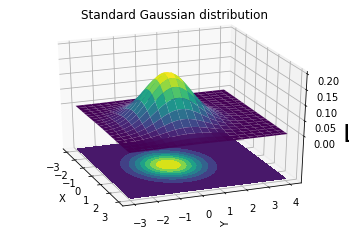

In [14]:
fig = plt.figure()

plt.subplot(2, 2, 1)

plt.subplot(2, 2, 2)
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0], [0 ,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z,zdir = 'z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)
ax.set_xlabel('X')
ax.set_ylabel('Y',rotation = 90)
ax.set_zlabel('L',fontsize=25)


plt.subplot(2, 2, 3)


plt.subplot(2, 2, 4)
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([0., 0.])
Sigma = np.array([[ 1. , 0], [0 ,  1.]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)

    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z,zdir = 'z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)
ax.set_xlabel('X')
ax.set_ylabel('Y',rotation = 90)
ax.set_zlabel('L',fontsize=25)
plt.title('Standard Gaussian distribution')
plt.show()


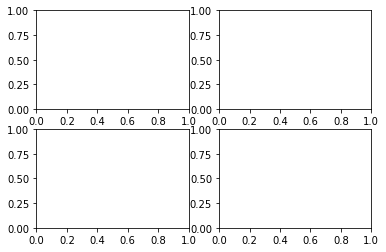

In [15]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)


plt.show()